# Multiple Linear Regression

### Question 1. 
Build a predictive linear regression model for given dataset, given humidity predict apparent temperature

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("weatherHistory.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Cleaning and PreProcessing

In [3]:
df.head()     # First 10 rows of the training data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


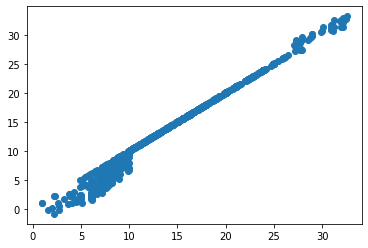

In [4]:
plt.scatter(df['Temperature (C)'][:1000], df['Apparent Temperature (C)'][:1000])

In [5]:
data = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Apparent Temperature (C)']]
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
       Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0             9.472222      0.89            14.1197                   251.0   
1             9.355556      0.86            14.2646                   259.0   
2             9.377778      0.89             3.9284                   204.0   
3             8.288889      0.83            14.1036                   269.0   
4             8.755556      0.83            11.0446                   259.0   
...                ...       ...                ...                     ...   
96448        26.016667      0.43            10.9963                    31.0   
96449        24.583333      0.48            10.0947                    20.0   
96450        22.038889      0.56             8.9838                    30.0   
96451        21.522222      0.60            10.5294                    20.0   
96452        20.438889      0.61             5.8765                    39.0   

       Visibi

### Renaming the columns

In [6]:
data.rename(columns={'Temperature (C)': 'Temp', 'Wind Speed (km/h)':'Speed', 'Wind Bearing (degrees)':'Bearing', 'Visibility (km)':'Visibility', 'Pressure (millibars)':'Pressure', 'Apparent Temperature (C)':'Target_Temp'}, inplace=True)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_25020\3628520032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Temperature (C)': 'Temp', 'Wind Speed (km/h)':'Speed', 'Wind Bearing (degrees)':'Bearing', 'Visibility (km)':'Visibility', 'Pressure (millibars)':'Pressure', 'Apparent Temperature (C)':'Target_Temp'}, inplace=True)


In [7]:
data.describe()     # detailed descriptive analysis of data

,Temp,Humidity,Speed,Bearing,Visibility,Pressure,Target_Temp
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956,10.855029
std,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906,10.696847
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,-27.716667
25%,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000,2.311111
50%,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,12.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,18.838889
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,39.344444


### Replacing the zero values with mean

In [8]:
data['Temp'] = data['Temp'].replace(0, np.mean(data['Temp']))
data['Humidity'] = data['Humidity'].replace(0, np.mean(data['Humidity']))
data['Speed'] = data['Speed'].replace(0, np.mean(data['Speed']))
data['Bearing'] = data['Bearing'].replace(0, np.mean(data['Bearing']))
data['Pressure'] = data['Pressure'].replace(0, np.mean(data['Pressure']))
data['Visibility'] = data['Visibility'].replace(0, np.mean(data['Visibility']))
data['Target_Temp'] = data['Target_Temp'].replace(0, np.mean(data['Target_Temp']))

C:\Users\zeesh\AppData\Local\Temp\ipykernel_25020\2602940122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temp'] = data['Temp'].replace(0, np.mean(data['Temp']))
C:\Users\zeesh\AppData\Local\Temp\ipykernel_25020\2602940122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Humidity'] = data['Humidity'].replace(0, np.mean(data['Humidity']))
C:\Users\zeesh\AppData\Local\Temp\ipykernel_25020\2602940122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [9]:
data.describe() 

,Temp,Humidity,Speed,Bearing,Visibility,Pressure,Target_Temp
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.972886,0.735067,10.956010,191.910556,10.395600,1016.632822,10.862794
std,9.526313,0.195157,6.797409,103.375681,4.131833,7.881878,10.692904
min,-21.822222,0.120000,0.032200,1.000000,0.016100,973.780000,-27.716667
25%,4.838889,0.600000,6.118000,128.000000,8.468600,1011.900000,2.338889
50%,12.000000,0.780000,10.320100,187.509232,10.046400,1016.450000,12.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,18.838889
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,39.344444


In [10]:
data.shape

(96453, 7)

<AxesSubplot:xlabel='Temp', ylabel='Humidity'>

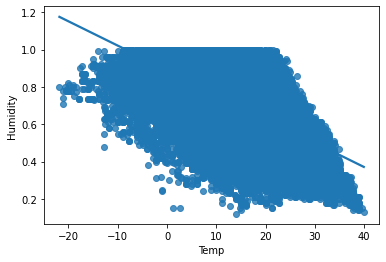

In [11]:
sn.regplot(x=data["Temp"], y=data["Humidity"])

array([[<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Speed'}>],
       [<AxesSubplot:title={'center':'Bearing'}>,
        <AxesSubplot:title={'center':'Visibility'}>,
        <AxesSubplot:title={'center':'Pressure'}>],
       [<AxesSubplot:title={'center':'Target_Temp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

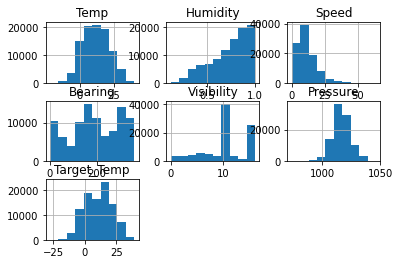

In [12]:
data.hist()

<AxesSubplot:>

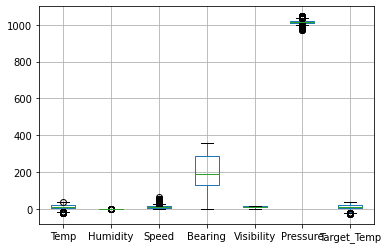

In [13]:
data.boxplot()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         96453 non-null  float64
 1   Humidity     96453 non-null  float64
 2   Speed        96453 non-null  float64
 3   Bearing      96453 non-null  float64
 4   Visibility   96453 non-null  float64
 5   Pressure     96453 non-null  float64
 6   Target_Temp  96453 non-null  float64
dtypes: float64(7)
memory usage: 5.2 MB


In [15]:
data.isnull().sum()

Temp           0
Humidity       0
Speed          0
Bearing        0
Visibility     0
Pressure       0
Target_Temp    0
dtype: int64

In [16]:
data.isna().any()

Temp           False
Humidity       False
Speed          False
Bearing        False
Visibility     False
Pressure       False
Target_Temp    False
dtype: bool

<AxesSubplot:>

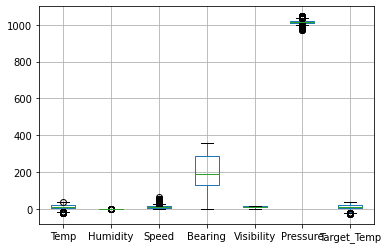

In [17]:
data.boxplot()

In [18]:
dataframe = data

In [19]:
dataframe.shape

(96453, 7)

In [20]:
dataframe.isna().any()

Temp           False
Humidity       False
Speed          False
Bearing        False
Visibility     False
Pressure       False
Target_Temp    False
dtype: bool

<AxesSubplot:>

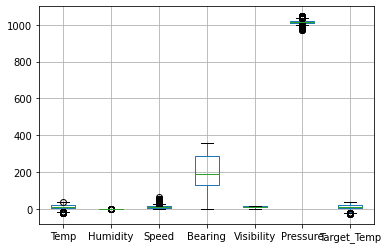

In [21]:
dataframe.boxplot()

In [22]:
# dataframe['Target_Temp']

In [23]:
# y_values = dataframe['Target_Temp']
# print(y_values)
# dataframe = dataframe.drop('Target_Temp', axis=1)

In [24]:
# dataframe = dataframe.drop('Target_Temp', axis=1)

In [25]:
dataframe.describe()

,Temp,Humidity,Speed,Bearing,Visibility,Pressure,Target_Temp
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.972886,0.735067,10.956010,191.910556,10.395600,1016.632822,10.862794
std,9.526313,0.195157,6.797409,103.375681,4.131833,7.881878,10.692904
min,-21.822222,0.120000,0.032200,1.000000,0.016100,973.780000,-27.716667
25%,4.838889,0.600000,6.118000,128.000000,8.468600,1011.900000,2.338889
50%,12.000000,0.780000,10.320100,187.509232,10.046400,1016.450000,12.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,18.838889
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,39.344444


In [26]:
dataframe.shape

(96453, 7)

In [27]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,96453.0,11.972886,9.526313,-21.822222,4.838889,12.000000,18.838889,39.905556
Humidity,96453.0,0.735067,0.195157,0.120000,0.600000,0.780000,0.890000,1.000000
Speed,96453.0,10.956010,6.797409,0.032200,6.118000,10.320100,14.135800,63.852600
Bearing,96453.0,191.910556,103.375681,1.000000,128.000000,187.509232,290.000000,359.000000
Visibility,96453.0,10.395600,4.131833,0.016100,8.468600,10.046400,14.812000,16.100000
Pressure,96453.0,1016.632822,7.881878,973.780000,1011.900000,1016.450000,1021.090000,1046.380000
Target_Temp,96453.0,10.862794,10.692904,-27.716667,2.338889,12.000000,18.838889,39.344444


In [28]:
dataframe.isnull().any()

Temp           False
Humidity       False
Speed          False
Bearing        False
Visibility     False
Pressure       False
Target_Temp    False
dtype: bool

In [29]:
dataframe.isna().any()

Temp           False
Humidity       False
Speed          False
Bearing        False
Visibility     False
Pressure       False
Target_Temp    False
dtype: bool

In [30]:
dataframe.corr()

,Temp,Humidity,Speed,Bearing,Visibility,Pressure,Target_Temp
Temp,1.000000,-0.635082,0.007405,0.026782,0.388850,-0.299489,0.989870
Humidity,-0.635082,1.000000,-0.216652,0.014218,-0.372045,0.040155,-0.605598
Speed,0.007405,-0.216652,1.000000,0.071830,0.100626,-0.248783,-0.058516
Bearing,0.026782,0.014218,0.071830,1.000000,0.046504,-0.067811,0.027534
Visibility,0.388850,-0.372045,0.100626,0.046504,1.000000,-0.147526,0.379335
Pressure,-0.299489,0.040155,-0.248783,-0.067811,-0.147526,1.000000,-0.276626
Target_Temp,0.989870,-0.605598,-0.058516,0.027534,0.379335,-0.276626,1.000000


In [31]:
dataframe.skew()

Temp           0.088837
Humidity      -0.709754
Speed          1.161486
Bearing       -0.161060
Visibility    -0.482640
Pressure       0.078209
Target_Temp   -0.058796
dtype: float64

<AxesSubplot:>

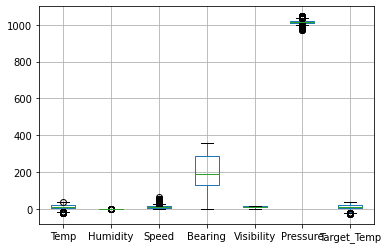

In [32]:
dataframe.boxplot()

Defining a function to check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2304e71b280>,
 'caps': [<matplotlib.lines.Line2D at 0x2304e71b820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2304e71afb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2304e71bdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2304e26c0d0>],
 'means': []}

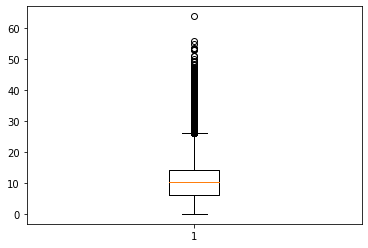

In [33]:
plt.boxplot(dataframe['Speed'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temp', ylabel='Density'>

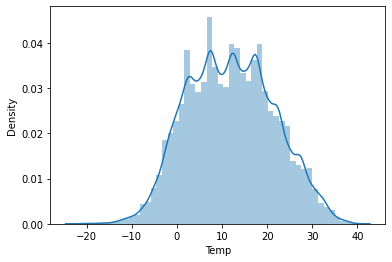

In [34]:
sn.distplot(dataframe['Temp'])

In [35]:
dataframe.describe()

,Temp,Humidity,Speed,Bearing,Visibility,Pressure,Target_Temp
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.972886,0.735067,10.956010,191.910556,10.395600,1016.632822,10.862794
std,9.526313,0.195157,6.797409,103.375681,4.131833,7.881878,10.692904
min,-21.822222,0.120000,0.032200,1.000000,0.016100,973.780000,-27.716667
25%,4.838889,0.600000,6.118000,128.000000,8.468600,1011.900000,2.338889
50%,12.000000,0.780000,10.320100,187.509232,10.046400,1016.450000,12.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,18.838889
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,39.344444


In [36]:
dataframe.skew()

Temp           0.088837
Humidity      -0.709754
Speed          1.161486
Bearing       -0.161060
Visibility    -0.482640
Pressure       0.078209
Target_Temp   -0.058796
dtype: float64

### Transformation of Features to reduce skewness

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

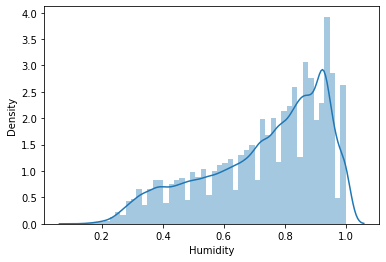

In [37]:
sn.distplot(dataframe.Humidity)

Skewness is -0.293327611991931


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zeesh\AppData\Local\Temp\ipykernel_25020\3858089394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Humidity'] = target


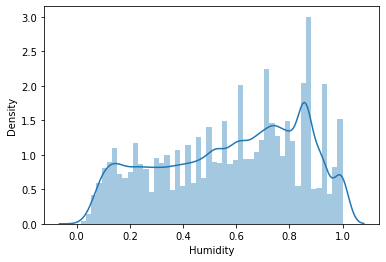

In [38]:
# now transforming feature variable
target = (np.square((dataframe.Humidity)))
print ('Skewness is', target.skew())
sn.distplot(target)
dataframe['Humidity'] = target

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Speed', ylabel='Density'>

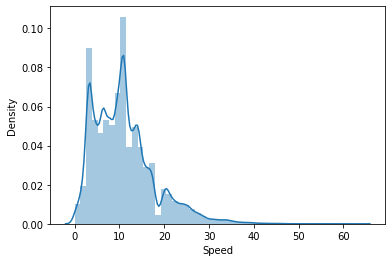

In [39]:
sn.distplot(dataframe.Speed)

Skewness is 0.22625755445916107


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zeesh\AppData\Local\Temp\ipykernel_25020\998140466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Speed'] = target


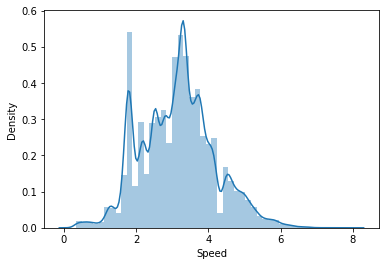

In [40]:
# now transforming feature variable
target = (np.sqrt((dataframe.Speed)))
print ('Skewness is', target.skew())
sn.distplot(target)
dataframe['Speed'] = target

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Visibility', ylabel='Density'>

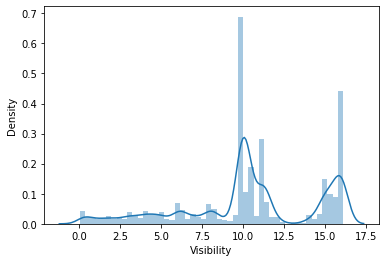

In [41]:
sn.distplot(dataframe.Visibility)

Skewness is 0.02883483640939428


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zeesh\AppData\Local\Temp\ipykernel_25020\1848854580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Visibility'] = target


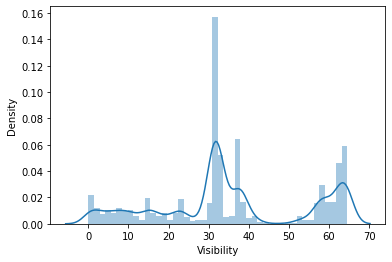

In [42]:
# now transforming feature variable
target = (np.power((dataframe.Visibility), 1.5))
print ('Skewness is', target.skew())
sn.distplot(target)
dataframe['Visibility'] = target

In [43]:
def remove_outlier(data):
        quant_df = data.quantile([0.10, 0.90])
        for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.10, name]) & (data[name] < quant_df.loc[0.90, name])]
        return data

In [44]:
dataframe = remove_outlier(dataframe)

<AxesSubplot:>

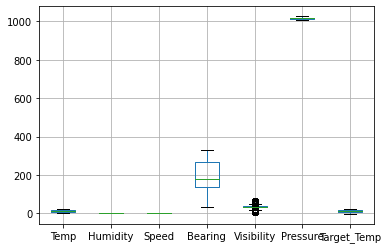

In [45]:
dataframe.boxplot()

## Feature Scaling

In [46]:
# # using min max
# def feature_scaling_column(df, column_scaling):
#     mean_of_col = df[column_scaling].mean()
#     std_of_col = df[column_scaling].std()
#     print(f'for col= {column_scaling} mean= {mean_of_col} and std={std_of_col}')
#     for counter in range(0, len(df)):
#         df.loc[counter, column_scaling] =  ((df.loc[counter, column_scaling] - mean_of_col) / std_of_col)
#     print("successfully scaled column ",column_scaling)
#     return df

In [47]:

dataframe.isna().sum()

Temp           0
Humidity       0
Speed          0
Bearing        0
Visibility     0
Pressure       0
Target_Temp    0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
dataframe.shape

(26239, 7)

In [50]:
y_values = dataframe['Target_Temp']

In [51]:
y_values.shape

(26239,)

In [52]:

dataframe = dataframe.drop('Target_Temp', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, y_values, test_size = 0.3)

### Gradient Descent Algorithm

**Cost Function**

For Univariate Linear Regression, We have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [54]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * m)                       
    return cost

In [55]:
# # Compute and display cost using our pre-chosen optimal parameters. 
# cost = compute_cost(X_train, y_train, w_init, b_init)
# print(f'Cost at w : {cost}')

# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously 


In [56]:
def gradient_computation(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
    return dj_db, dj_dw


## Gradient Descent With Multiple Variables

In [57]:
import copy

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)  
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw          
        b = b - alpha * dj_db          
    return w, b #return final w,b for graphing

In [58]:
data.describe()   # Checking the training data before implementing the algorithm

,Temp,Humidity,Speed,Bearing,Visibility,Pressure,Target_Temp
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.972886,0.578409,3.149963,191.910556,35.658563,1016.632822,10.862794
std,9.526313,0.262671,1.016736,103.375681,18.715782,7.881878,10.692904
min,-21.822222,0.014400,0.179444,1.000000,0.002043,973.780000,-27.716667
25%,4.838889,0.360000,2.473459,128.000000,24.644354,1011.900000,2.338889
50%,12.000000,0.608400,3.212491,187.509232,31.843126,1016.450000,12.000000
75%,18.838889,0.792100,3.759761,290.000000,57.005998,1021.090000,18.838889
max,39.905556,1.000000,7.990782,359.000000,64.600937,1046.380000,39.344444


In [59]:
# A function to normalize the input data  ---> Here we are scaling the features for better implementation
def standardise(data):
	for i in range(data.size):
		data[i] = ((data[i] - np.mean(data))/np.std(data))

In [60]:
# x_train = x_train.values
# # normalize(x_train)  # Here we are scaling the features for better implementation
# print(x_train)

In [61]:
# y_train = y_train.values
# normalize(y_train)  # Here we are scaling the features for better implementation

In [62]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [63]:
# for i in X_train:
#     standardise(i)

In [64]:
X_train[0].shape

(6,)

In [65]:

# initialize parameters
initial_w = np.zeros_like(X_train[0])
initial_b = 0.
# some gradient descent settings
iterations = 5000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final= gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, gradient_computation, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
# for i in range(m):
#     print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: 0.00,[ 0.11763499 -0.00145714 -0.0016488   0.00150102  0.04399374  0.00791475] 


In [66]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p  

In [67]:
x_test = np.array(X_test)
y_expected = np.array(y_test)
y_test = np.array([predict(i, w_final, b_final) for i in x_test])

In [68]:
# function to check the accuracy of the prediction
def accuracy_check(y_predicted, y_data):
        p, e = y_predicted, y_data
        n = len(y_predicted)
        return 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

In [69]:
print(accuracy_check(y_expected, y_test))

0.4676959237227143
